# Data Visualization
👉 **This Notebook [Kernal] is intended for hands-on practice with data visualization, using popular Python libraries like Matplotlib and Seaborn.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/ai_job_dataset1.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Python Libraries #

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [4]:
df_ai = pd.read_csv('/content/ai_job_dataset1.csv')
df_ai.head()

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


# Dataset explortion

In [5]:
df_ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   salary_local            15000 non-null  int64  
 5   experience_level        15000 non-null  object 
 6   employment_type         15000 non-null  object 
 7   company_location        15000 non-null  object 
 8   company_size            15000 non-null  object 
 9   employee_residence      15000 non-null  object 
 10  remote_ratio            15000 non-null  int64  
 11  required_skills         15000 non-null  object 
 12  education_required      15000 non-null  object 
 13  years_experience        15000 non-null  int64  
 14  industry                15000 non-null

In [6]:
df_ai.isnull().sum()

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
salary_local,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0


In [7]:
df_ai_details = df_ai.describe(include='all')
df_ai_details.loc[len(df_ai)] = df_ai.dtypes.values
df_ai_details

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
count,15000,15000,15000.0,15000,15000.0,15000,15000,15000,15000,15000,15000.0,15000,15000,15000.0,15000,15000,15000,15000.0,15000.0,15000
unique,15000,20,NaN,8,NaN,4,4,20,3,50,NaN,13651,4,NaN,15,486,543,NaN,NaN,16
top,AI15000,Machine Learning Engineer,NaN,USD,NaN,EX,CT,Switzerland,L,Switzerland,NaN,"Python, TensorFlow, Tableau",Bachelor,NaN,Government,2025-04-16,2024-10-07,NaN,NaN,Machine Intelligence Group
freq,1,824,NaN,7453,NaN,3843,3841,819,5087,669,NaN,9,3863,NaN,1035,49,49,NaN,NaN,986
mean,NaN,NaN,121991.938267,NaN,829236.584333,NaN,NaN,NaN,NaN,NaN,50.196667,NaN,NaN,6.365667,NaN,NaN,NaN,1500.8526,7.49954,NaN
std,NaN,NaN,63968.361846,NaN,3425324.577897,NaN,NaN,NaN,NaN,NaN,40.844084,NaN,NaN,5.598551,NaN,NaN,NaN,574.724647,1.444202,NaN
min,NaN,NaN,16621.0,NaN,16621.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,500.0,5.0,NaN
25%,NaN,NaN,74978.5,NaN,73830.75,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2.0,NaN,NaN,NaN,998.75,6.3,NaN
50%,NaN,NaN,107261.5,NaN,109035.5,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,5.0,NaN,NaN,NaN,1512.0,7.5,NaN
75%,NaN,NaN,155752.25,NaN,167327.75,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,10.0,NaN,NaN,NaN,1994.0,8.8,NaN


In [8]:
df_ai.dtypes

,0
job_id,object
job_title,object
salary_usd,int64
salary_currency,object
salary_local,int64
experience_level,object
employment_type,object
company_location,object
company_size,object
employee_residence,object


In [9]:
df_ai.iloc[0]

,0
job_id,AI00001
job_title,Data Scientist
salary_usd,219728
salary_currency,USD
salary_local,219728
experience_level,EX
employment_type,PT
company_location,Sweden
company_size,M
employee_residence,Sweden


In [10]:
df_ai[['job_title',
'salary_currency',
'experience_level',
'employment_type',
'company_location',
'company_size',
'employee_residence',
'remote_ratio',
'education_required',
'industry']].nunique()

,0
job_title,20
salary_currency,8
experience_level,4
employment_type,4
company_location,20
company_size,3
employee_residence,50
remote_ratio,3
education_required,4
industry,15


In [11]:
df_ai['benefits_score'].value_counts().reset_index().sort_values(by='benefits_score').head()

,benefits_score,count
50,5.0,125
14,5.1,304
42,5.2,284
11,5.3,313
43,5.4,284


# Feature Engineering

In [12]:
df_ai['employment_type'].unique()
#FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)

def f_employment_type(param_emp):
    if param_emp == 'FL':
        return 1
    elif param_emp == 'CT':
        return 2
    elif param_emp == 'PT':
        return 3
    elif param_emp == 'FT':
        return 4
    else:
        return 0

df_ai['employment_type_num'] = df_ai['employment_type'].apply(f_employment_type)
df_ai['employment_type_num'].value_counts()

,count
employment_type_num,
2,3841
3,3757
1,3705
4,3697


In [13]:
df_ai['experience_level'].unique()
# EN (Entry), MI (Mid), SE (Senior), EX (Executive)

def f_experience_level(param_exp):
    if param_exp == 'EN':
        return 1
    elif param_exp == 'MI':
        return 2
    elif param_exp == 'SE':
        return 3
    elif param_exp == 'EX':
        return 4
    else:
        return 0

df_ai['experience_level_num'] = df_ai['experience_level'].apply(f_experience_level)
df_ai['experience_level_num'].value_counts()

,count
experience_level_num,
4,3843
2,3764
3,3741
1,3652


In [14]:
df_ai['education_required'].unique()
#['Bachelor', 'Master', 'Associate', 'PhD']

def f_education_required(param_education):
    if param_education == 'Associate':
        return 1
    elif param_education == 'Bachelor':
        return 2
    elif param_education == 'Master':
        return 3
    elif param_education == 'PhD':
        return 4
    else:
        return 0

df_ai['education_required_num'] = df_ai['education_required'].apply(f_education_required)
df_ai['education_required_num'].value_counts()

,count
education_required_num,
2,3863
4,3761
1,3688
3,3688


In [15]:
df_ai['company_size'].unique()
#S (Small <50), M (Medium 50-250), L (Large >250)

def f_company_size(param_company_size):
    if param_company_size == 'S':
        return 1
    elif param_company_size == 'M':
        return 2
    elif param_company_size == 'L':
        return 3
    else:
        return 0

df_ai['company_size_num'] = df_ai['company_size'].apply(f_company_size)
df_ai['company_size_num'].value_counts()

,count
company_size_num,
3,5087
1,4975
2,4938


# Visualizations

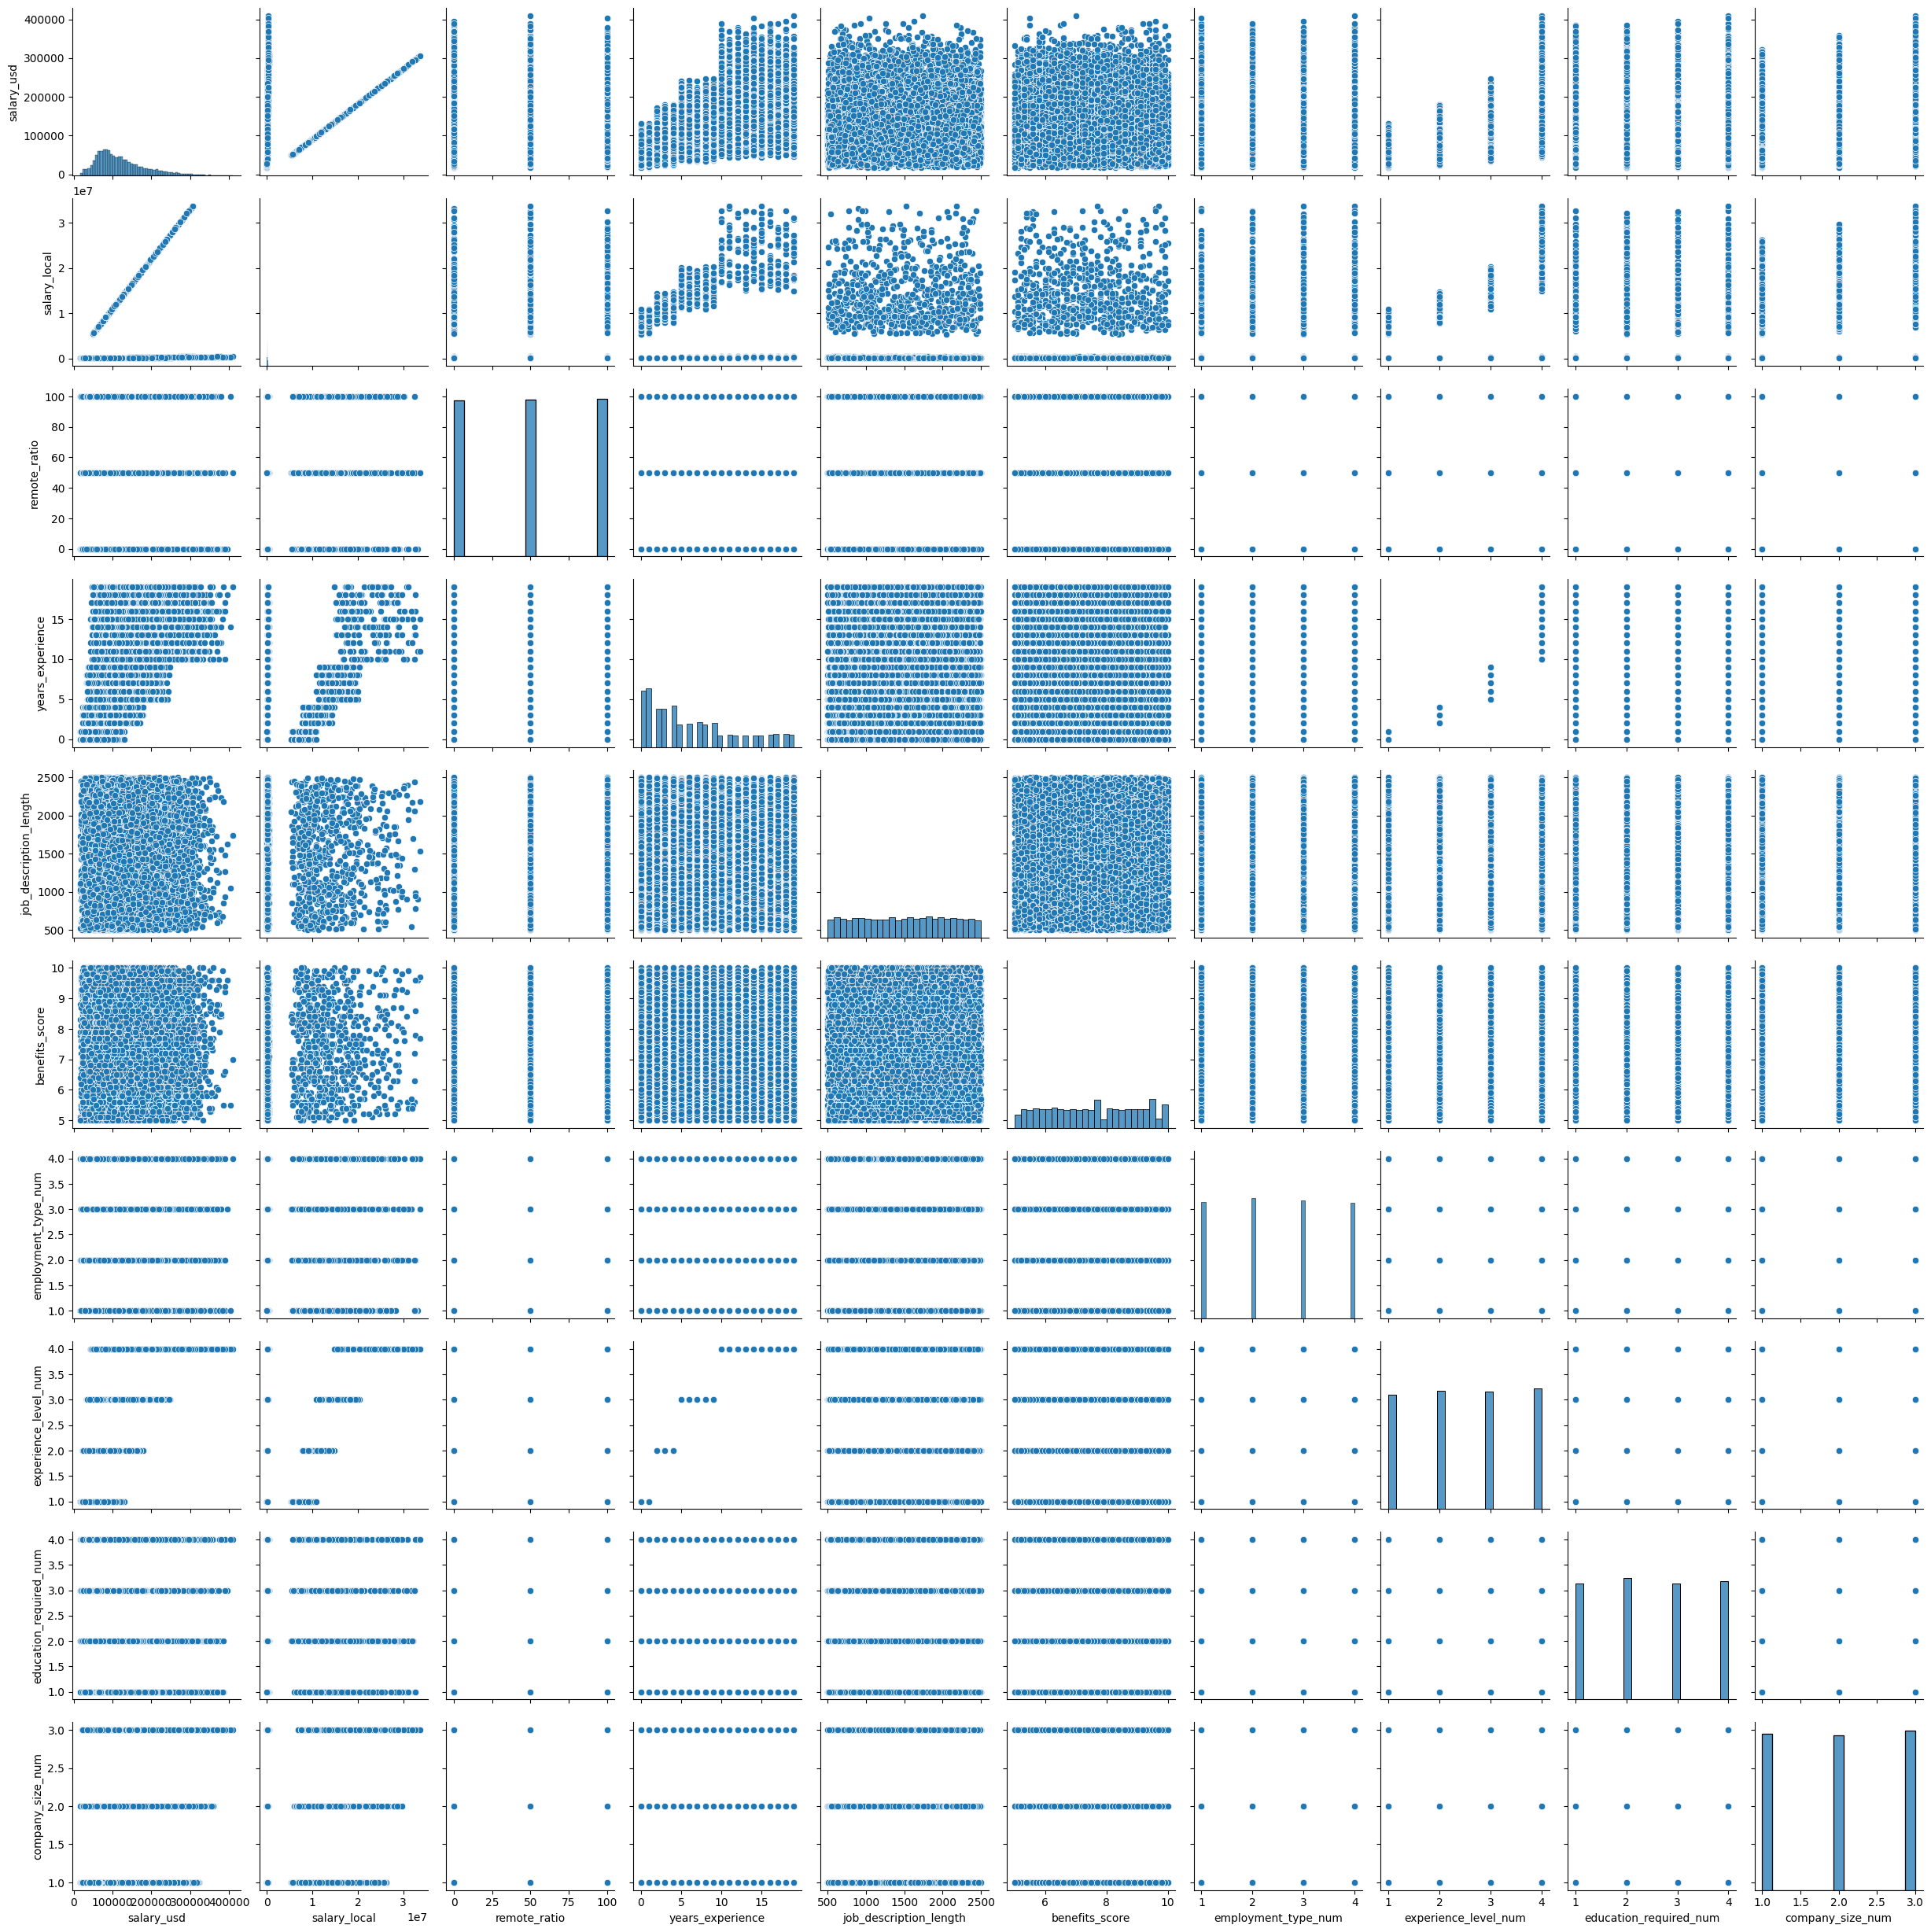

In [16]:
sns.pairplot(df_ai)
plt.show()

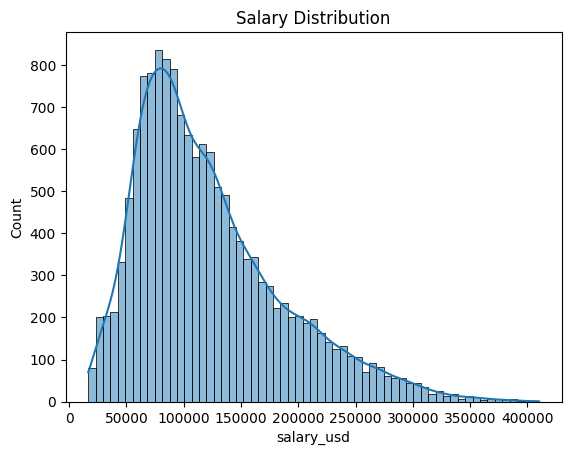

In [17]:
sns.histplot(data=df_ai,x='salary_usd',kde=True)
plt.title('Salary Distribution')
plt.show()

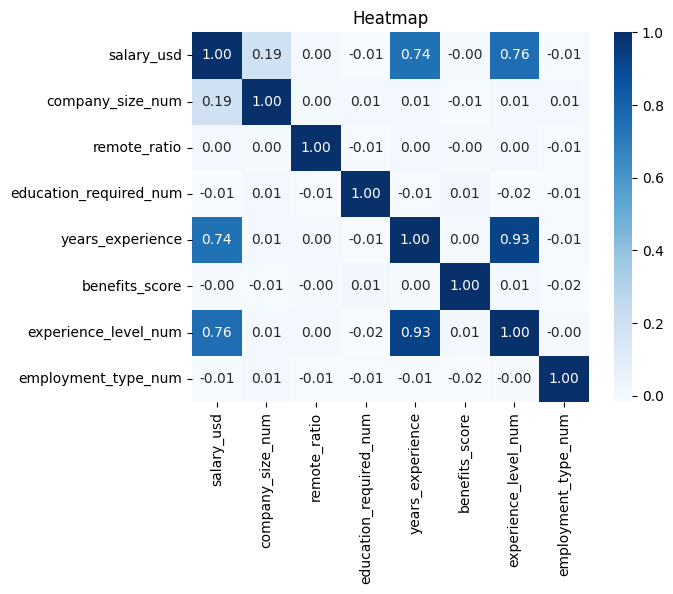

In [18]:
numerical_columns = ['salary_usd','company_size_num', 'remote_ratio','education_required_num','years_experience',
       'benefits_score', 'experience_level_num', 'employment_type_num']
sns.heatmap(df_ai[numerical_columns].corr(),annot=True,fmt=".2f",cmap='Blues')
plt.title('Heatmap')
plt.show()

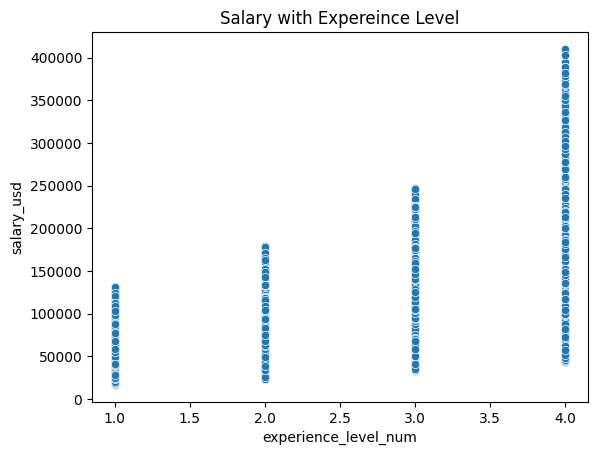

In [19]:
sns.scatterplot(data = df_ai,x='experience_level_num',y='salary_usd')
plt.title('Salary with Expereince Level')
plt.show()

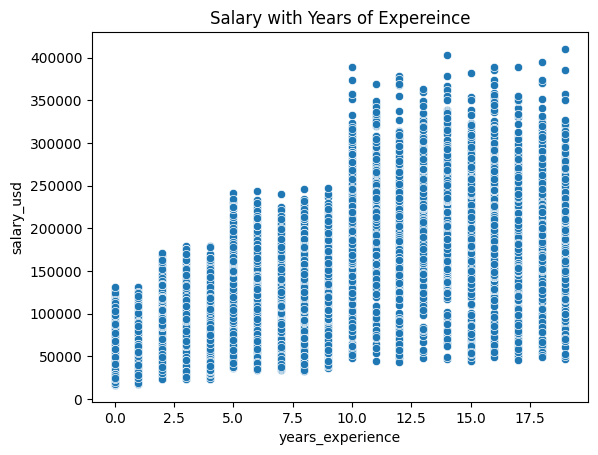

In [20]:
sns.scatterplot(data = df_ai,x='years_experience',y='salary_usd')
plt.title('Salary with Years of Expereince')
plt.show()

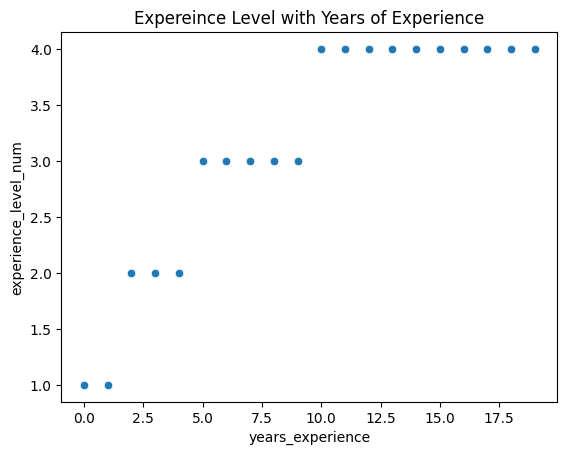

In [21]:
sns.scatterplot(data = df_ai,x='years_experience',y='experience_level_num')
plt.title('Expereince Level with Years of Experience')
plt.show()

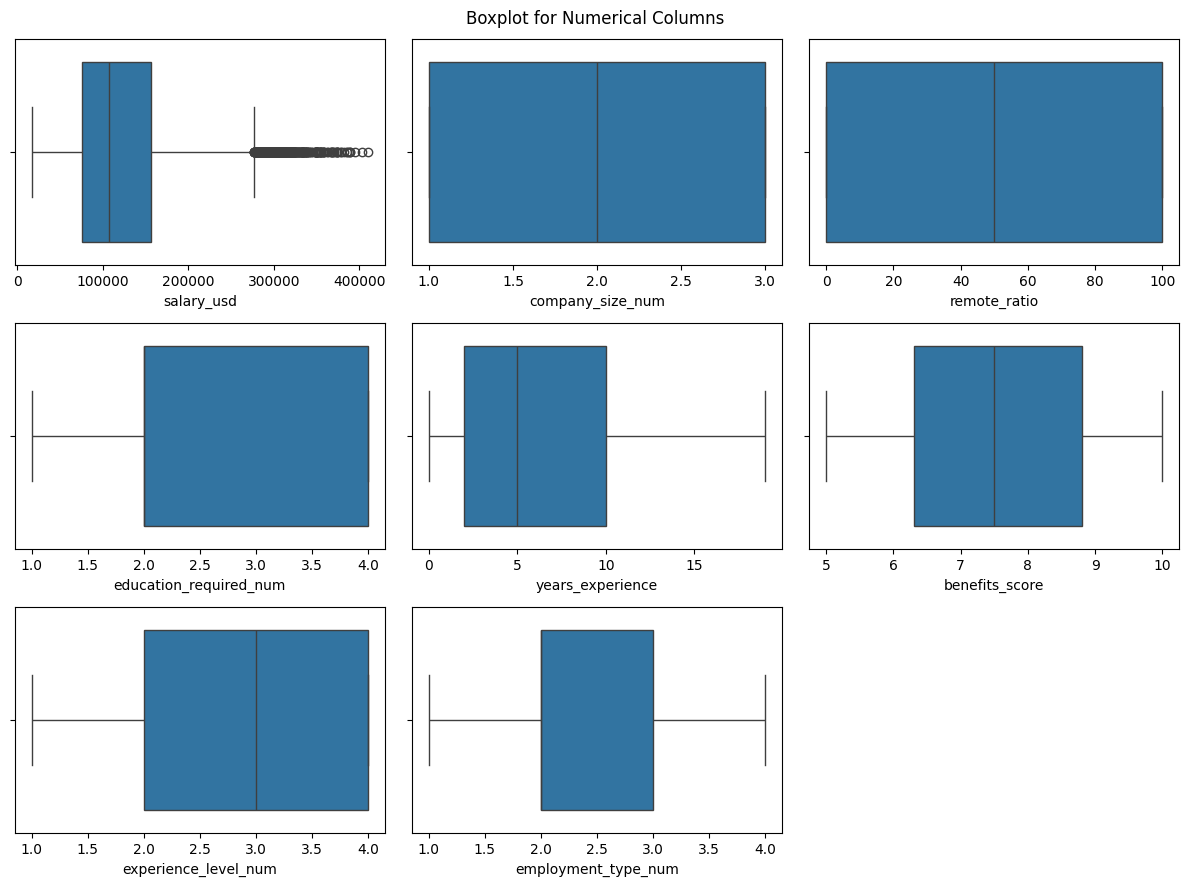

In [22]:
i = 1
plt.figure(figsize=(12,9))

for column in numerical_columns:
    plt.subplot(3,3,i)
    sns.boxplot(x=df_ai[column])
    # plt.title(column)
    i += 1
plt.suptitle('Boxplot for Numerical Columns')
plt.tight_layout()
plt.show()

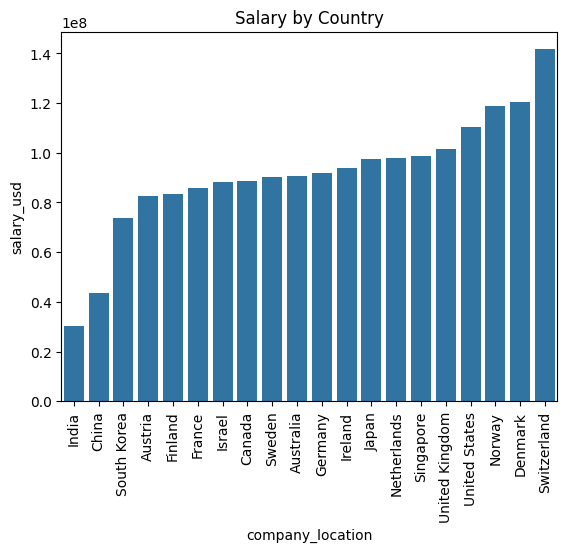

In [23]:
df_salary_country = df_ai.groupby('company_location')['salary_usd'].sum().reset_index().sort_values(by='salary_usd')
sns.barplot(data=df_salary_country,x='company_location',y='salary_usd')
plt.xticks(rotation=90)
plt.title('Salary by Country')
plt.show()

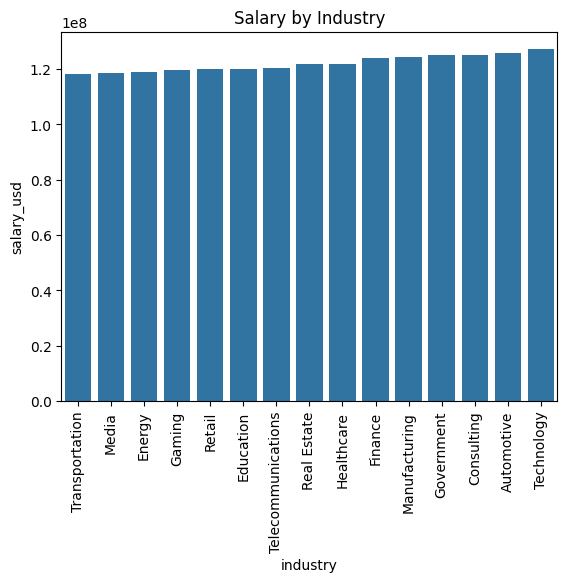

In [24]:
df_salary_industry = df_ai.groupby('industry')['salary_usd'].sum().reset_index().sort_values(by='salary_usd')
sns.barplot(data=df_salary_industry,x='industry',y='salary_usd')
plt.xticks(rotation=90)
plt.title('Salary by Industry')
plt.show()

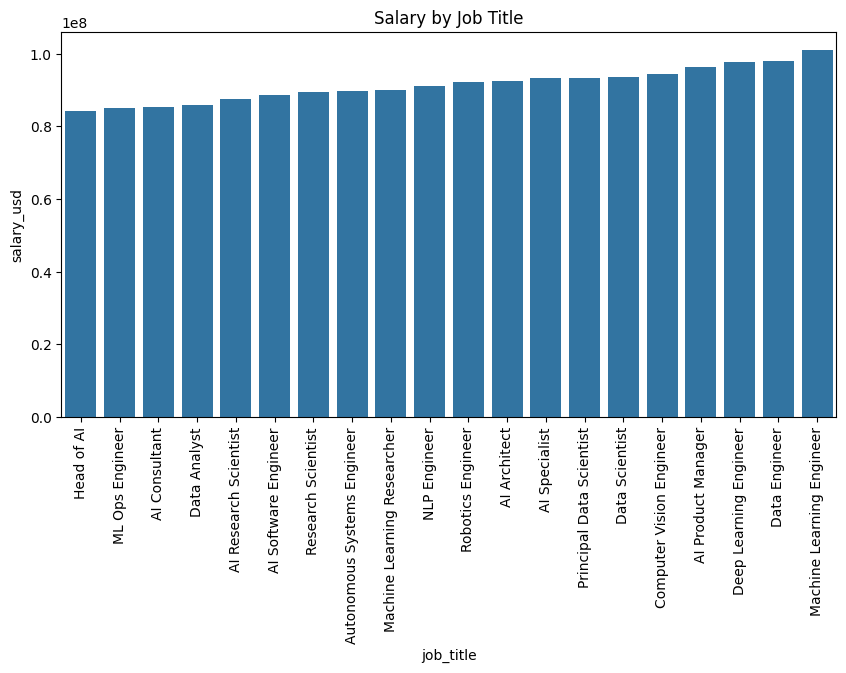

In [25]:
plt.figure(figsize=(10,5))
df_salary_job_title = df_ai.groupby('job_title')['salary_usd'].sum().reset_index().sort_values(by='salary_usd')
sns.barplot(data=df_salary_job_title,x='job_title',y='salary_usd')
plt.xticks(rotation=90)
plt.title('Salary by Job Title')
plt.show()